![vectorization](https://miro.medium.com/v2/resize:fit:640/format:webp/1*V_SlJTij8lH8-bxctCEivg.png)

## Matrix Multiplication and Vectorization in Machine Learning and Deep Learning

Matrix multiplication and vectorization are cornerstone techniques in modern machine learning, transforming how we implement and optimize algorithms. Understanding these concepts is crucial for building efficient, scalable machine learning systems.

### Why Vectorization Matters in Machine Learning

**Computational Efficiency**

- **Hardware Optimization**: Libraries like NumPy, TensorFlow, and PyTorch are built on optimized low-level implementations (C/C++/CUDA)
- **SIMD Operations**: Single Instruction, Multiple Data operations allow processing multiple elements simultaneously
- **Performance Gains**: Vectorized operations can be 10-100x faster than equivalent Python loops
- **Memory Efficiency**: Reduced memory allocation overhead and better cache utilization

**Algorithmic Simplicity**

- **Concise Code**: Complex mathematical operations become single-line expressions
- **Reduced Bugs**: Fewer loops mean fewer opportunities for indexing errors
- **Mathematical Clarity**: Code structure mirrors mathematical notation more closely
- **Maintainability**: Easier to read, understand, and modify vectorized implementations

**Parallel Processing Power**

- **Multi-core CPUs**: Automatic distribution across available CPU cores
- **GPU Acceleration**: Seamless utilization of thousands of GPU cores for massive parallelism
- **Distributed Computing**: Efficient scaling across multiple machines
- **Asynchronous Operations**: Non-blocking computations for better resource utilization

**Batch Processing Excellence**

- **Training Efficiency**: Process entire datasets or mini-batches simultaneously
- **Neural Networks**: Essential for forward and backward propagation across multiple samples
- **Feature Engineering**: Apply transformations to all samples at once
- **Prediction Speed**: Generate predictions for thousands of samples in milliseconds

**Optimization Acceleration**

- **Gradient Descent**: Vectorized gradient computations for faster convergence
- **Matrix Factorization**: Efficient decomposition techniques for dimensionality reduction
- **Regularization**: Apply penalties across all parameters simultaneously
- **Cross-validation**: Parallel model evaluation across different folds

### Real-World Impact

Consider training a neural network on 10,000 samples with 100 features:
- **Loop-based approach**: ~10 seconds per epoch
- **Vectorized approach**: ~0.1 seconds per epoch

This 100x speedup means the difference between waiting hours vs. minutes for model training, enabling rapid experimentation and iteration in machine learning workflows.

### Mathematical Foundation

Vectorization leverages the mathematical properties of linear algebra to transform element-wise operations into matrix operations, which are inherently more efficient and parallelizable. This transformation is the foundation that makes modern deep learning feasible on large-scale datasets.

### Prerequisite: Matrix Operations in NumPy

#### Matrix Fundamentals
Matrices are two-dimensional arrays where all elements are of the same data type. They form the backbone of linear algebra operations in machine learning and are essential for efficient computation.

#### Mathematical Notation and Conventions
- **Matrix Notation**: Matrices are denoted with capital, bold letters such as $\mathbf{X}$, $\mathbf{W}$, $\mathbf{A}$
- **Dimensions**: 
  - $m$ = number of rows (typically represents number of training examples)
  - $n$ = number of columns (typically represents number of features)
  - Matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ has $m$ rows and $n$ columns

#### Design Matrix with Bias Term
In machine learning, we often augment our feature matrix to include a bias term. The bias $b$ is incorporated as the **first column** of the matrix, consisting of all ones. This allows us to combine the bias and weights into a single matrix operation:

$$\mathbf{X}_{\text{augmented}} = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix} \in \mathbb{R}^{m \times (n+1)}$$

**Key Benefits of Bias Integration:**
- **Simplified Computation**: $\mathbf{y} = \mathbf{X}_{\text{augmented}} \mathbf{w}$ instead of $\mathbf{y} = \mathbf{X}\mathbf{w} + b$
- **Vectorized Operations**: All parameters (weights + bias) updated simultaneously
- **Cleaner Implementation**: Reduces code complexity and potential for errors

#### Matrix Element Indexing
- **Superscript notation**: $x^{(i)}$ refers to the $i^{th}$ training example
- **Subscript notation**: $x_j^{(i)}$ refers to the $j^{th}$ feature of the $i^{th}$ training example
- **Python indexing**: Remember that NumPy uses 0-based indexing (first element is index 0)

### Matrix Multiplication in NumPy

Matrix multiplication is a fundamental operation in linear algebra and machine learning. NumPy provides multiple methods to perform this operation, each with specific use cases and advantages.

#### Three Ways to Multiply Matrices in NumPy

**1. `np.dot()` - The Classic Approach**
- Most versatile NumPy function for matrix operations
- Works with 1D arrays (dot product), 2D arrays (matrix multiplication), and higher dimensions
- Legacy method, widely used in older codebases

**2. `@` Operator - The Modern Pythonic Way**
- Introduced in Python 3.5 (PEP 465)
- Cleaner, more readable syntax that mirrors mathematical notation
- Specifically designed for matrix multiplication
- **Recommended for new code**

**3. `np.matmul()` - The Explicit Matrix Multiplication**
- Explicitly designed for matrix multiplication
- Similar to `@` operator (in fact, `@` calls `matmul` internally)
- Useful when you want to emphasize that you're doing matrix multiplication
- Handles broadcasting differently than `np.dot()` for higher dimensions

#### Matrix Multiplication Rules

For matrix multiplication $\mathbf{C} = \mathbf{A} \mathbf{B}$:
- $\mathbf{A}$ has shape $(m, k)$
- $\mathbf{B}$ has shape $(k, n)$
- Result $\mathbf{C}$ has shape $(m, n)$
- **Critical Rule**: Number of columns in $\mathbf{A}$ must equal number of rows in $\mathbf{B}$

#### Example Below
In the code cells below, we'll demonstrate all three methods with:
- `matrix_a`: shape $(2, 3)$ - 2 rows, 3 columns
- `matrix_b`: shape $(3, 2)$ - 3 rows, 2 columns  
- `result`: shape $(2, 2)$ - 2 rows, 2 columns

All three methods produce identical results!

In [1]:
import numpy as np

# Define two matrices for demonstration
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6]])  # Shape: (2, 3)

matrix_b = np.array([[7, 8],
                     [9, 10],
                     [11, 12]])   # Shape: (3, 2)

print("Matrix A (2×3):")
print(matrix_a)
print(f"\nMatrix B (3×2):")
print(matrix_b)
print(f"\nA has {matrix_a.shape[1]} columns, B has {matrix_b.shape[0]} rows → Multiplication is valid ✓")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

A has 3 columns, B has 3 rows → Multiplication is valid ✓


In [2]:
# Method 1: Using np.dot() - Classic approach
result_dot = np.dot(matrix_a, matrix_b)

print("Method 1: np.dot(matrix_a, matrix_b)")
print(result_dot)
print(f"Result shape: {result_dot.shape}")
print("\nCalculation example for result[0,0]:")
print(f"  = (1×7) + (2×9) + (3×11)")
print(f"  = 7 + 18 + 33 = {result_dot[0, 0]}")

Method 1: np.dot(matrix_a, matrix_b)
[[ 58  64]
 [139 154]]
Result shape: (2, 2)

Calculation example for result[0,0]:
  = (1×7) + (2×9) + (3×11)
  = 7 + 18 + 33 = 58


In [3]:
# Method 2: Using @ operator - Modern, Pythonic approach (RECOMMENDED)
result_at = matrix_a @ matrix_b

print("Method 2: matrix_a @ matrix_b")
print(result_at)
print(f"Result shape: {result_at.shape}")
print(f"\n✓ Same result as np.dot(): {np.array_equal(result_dot, result_at)}")

Method 2: matrix_a @ matrix_b
[[ 58  64]
 [139 154]]
Result shape: (2, 2)

✓ Same result as np.dot(): True


In [4]:
# Method 3: Using np.matmul() - Explicit matrix multiplication
result_matmul = np.matmul(matrix_a, matrix_b)

print("Method 3: np.matmul(matrix_a, matrix_b)")
print(result_matmul)
print(f"Result shape: {result_matmul.shape}")
print(f"\n✓ All three methods produce identical results!")
print(f"  np.dot() == @ operator: {np.array_equal(result_dot, result_at)}")
print(f"  @ operator == np.matmul(): {np.array_equal(result_at, result_matmul)}")

Method 3: np.matmul(matrix_a, matrix_b)
[[ 58  64]
 [139 154]]
Result shape: (2, 2)

✓ All three methods produce identical results!
  np.dot() == @ operator: True
  @ operator == np.matmul(): True


### Matrix Transpose

The transpose operation is a fundamental matrix manipulation that swaps rows and columns. Understanding transposition is crucial for machine learning, as it frequently appears in gradient computations, matrix multiplications, and data transformations.

#### What is Matrix Transpose?

Given a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, its transpose $\mathbf{A}^T \in \mathbb{R}^{n \times m}$ is obtained by:
- Converting rows to columns
- Converting columns to rows
- Element at position $(i, j)$ in $\mathbf{A}$ moves to position $(j, i)$ in $\mathbf{A}^T$

**Mathematical Definition:**
$$(\mathbf{A}^T)_{ij} = \mathbf{A}_{ji}$$

#### Why Transpose Matters in Machine Learning

**1. Dimension Compatibility**
- Matrix multiplication requires: columns in first matrix = rows in second matrix
- Transposing can make incompatible matrices compatible for multiplication
- Example: $(m \times n) \times (n \times p) = (m \times p)$ ✓
- If dimensions don't match, transpose one: $(m \times n) \times (k \times p)^T = (m \times n) \times (p \times k)$ when $n = p$ ✓

**2. Gradient Computation**
- Computing gradients often requires transposing the feature matrix
- Example: $\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X}^T (\mathbf{Xw} - \mathbf{y})$
- The $\mathbf{X}^T$ ensures proper dimension alignment for gradient calculation

**3. Data Reshaping**
- Converting between row vectors and column vectors
- Reshaping data for different neural network architectures
- Aligning dimensions for batch processing

#### NumPy Transpose Methods

NumPy provides two convenient ways to transpose matrices:

**Method 1: `np.transpose()` Function**
- Explicit function call
- Works with multi-dimensional arrays
- Can specify axis permutations for higher dimensions

**Method 2: `.T` Attribute (RECOMMENDED)**
- More concise and Pythonic
- Commonly used in machine learning code
- Mirrors mathematical notation more closely

Both methods produce identical results and have the same computational efficiency.

In [5]:
# Method 1: Using np.transpose() function

# Define a matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

# Transpose the matrix
transposed_matrix = np.transpose(matrix)

print("Original matrix (2×3):")
print(matrix)
print(f"Shape: {matrix.shape}")

print("\nTransposed matrix (3×2):")
print(transposed_matrix)
print(f"Shape: {transposed_matrix.shape}")

print("\n🔄 Notice how rows become columns:")
print(f"  Original row 0: {matrix[0, :]} → Transposed column 0: {transposed_matrix[:, 0]}")
print(f"  Original row 1: {matrix[1, :]} → Transposed column 1: {transposed_matrix[:, 1]}")

Original matrix (2×3):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Transposed matrix (3×2):
[[1 4]
 [2 5]
 [3 6]]
Shape: (3, 2)

🔄 Notice how rows become columns:
  Original row 0: [1 2 3] → Transposed column 0: [1 2 3]
  Original row 1: [4 5 6] → Transposed column 1: [4 5 6]


In [6]:
# Method 2: Using the .T attribute (RECOMMENDED - More Pythonic)

transposed_matrix_T = matrix.T

print("Original matrix:")
print(matrix)

print("\nTransposed matrix using .T:")
print(transposed_matrix_T)

print(f"\n✓ Both methods produce identical results: {np.array_equal(transposed_matrix, transposed_matrix_T)}")

# Practical example: Making matrices compatible for multiplication
print("\n" + "="*60)
print("PRACTICAL EXAMPLE: Using Transpose for Matrix Multiplication")
print("="*60)

A = np.array([[1, 2],
              [3, 4],
              [5, 6]])  # Shape: (3, 2)

B = np.array([[7, 8, 9],
              [10, 11, 12]])  # Shape: (2, 3)

print(f"\nMatrix A shape: {A.shape}")
print(f"Matrix B shape: {B.shape}")

# Can we multiply A @ B?
print(f"\nA @ B possible? Columns in A ({A.shape[1]}) = Rows in B ({B.shape[0]}): {A.shape[1] == B.shape[0]} ✓")
result1 = A @ B
print(f"Result shape: {result1.shape}")

# What about B @ A?
print(f"\nB @ A possible? Columns in B ({B.shape[1]}) = Rows in A ({A.shape[0]}): {B.shape[1] == A.shape[0]} ✓")
result2 = B @ A
print(f"Result shape: {result2.shape}")

# Using transpose to enable multiplication
print(f"\nA.T @ B possible? Columns in A.T ({A.T.shape[1]}) = Rows in B ({B.shape[0]}): {A.T.shape[1] == B.shape[0]} ✗")
print("Cannot multiply without matching dimensions!")

print(f"\nA @ B.T shape: {A.shape} @ {B.T.shape} = {(A @ B.T).shape} ✓")
print(f"A.T @ B.T shape: {A.T.shape} @ {B.T.shape} = {(A.T @ B.T).shape} ✓")

Original matrix:
[[1 2 3]
 [4 5 6]]

Transposed matrix using .T:
[[1 4]
 [2 5]
 [3 6]]

✓ Both methods produce identical results: True

PRACTICAL EXAMPLE: Using Transpose for Matrix Multiplication

Matrix A shape: (3, 2)
Matrix B shape: (2, 3)

A @ B possible? Columns in A (2) = Rows in B (2): True ✓
Result shape: (3, 3)

B @ A possible? Columns in B (3) = Rows in A (3): True ✓
Result shape: (2, 2)

A.T @ B possible? Columns in A.T (3) = Rows in B (2): False ✗
Cannot multiply without matching dimensions!


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

##  Learning Objectives

By the end of this lab, you will be able to:

* Master Vectorized Gradient Descent Implementation
* Apply Scikit-learn's Closed-Form Solution 
* Implement Stochastic Gradient Descent (SGD)
* Compare and Analyze Different Approaches
* Build Predictive Models


### What Makes This Lab Unique?

This lab bridges the gap between **mathematical theory** and **practical implementation**. You'll see how the same linear regression problem can be solved using:
- **Your own vectorized implementation** (deep understanding)
- **Closed-form solution from Sklearn** (mathematical elegance)
- **SGDRegressor from Sklean** (scalability)

By comparing all three approaches, you'll develop the intuition needed to choose the right tool for any machine learning problem you encounter.

## Import necessary libaries 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy, math
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

## Gradient Descent for Multiple Linear Regression using Vectorization

In the previous lab, you implemented the gradient descent algorithm for Multiple Linear Regression (MLR) using **for loops**. While that approach works, it's **computationally slow** for large datasets. In this lab, you'll implement the same algorithm using **NumPy vectorization**, achieving dramatic performance improvements.

### Why Vectorization?

| Approach | Speed | Code Complexity | Scalability |
|----------|-------|-----------------|-------------|
| For Loops | Slow ⏳ | Higher | Poor for large data |
| Vectorized | **Fast** ⚡ | **Lower** | **Excellent** |



### Mathematical Foundations

#### Important Note on Notation

**In the following equations and implementation, the weight vector $\mathbf{w}$ incorporates the bias term $b$ as its first element.**

This means:
- $\mathbf{w} = [b, w_1, w_2, \ldots, w_n]^T$ (includes bias)
- $\mathbf{X}$ has a column of ones prepended: $\mathbf{X}_{\text{augmented}} = [1, x_1, x_2, \ldots, x_n]$



#### 1️⃣ Cost Function (Mean Squared Error)

**Summation Form:**
$$J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 = \frac{1}{2m} \sum_{i=1}^{m} \left( e^{(i)} \right)^2 \tag{1}$$

Where:
- $m$ = number of training examples
- $\hat{y}^{(i)} = \mathbf{x}^{(i)} \cdot \mathbf{w}$ = predicted value for example $i$
- $y^{(i)}$ = actual value for example $i$
- $e^{(i)} = \hat{y}^{(i)} - y^{(i)}$ = prediction error for example $i$

**Vectorized Form:**

Define the error vector: $\mathbf{e} = \mathbf{Xw} - \mathbf{y}$

Then the cost becomes:
$$J(\mathbf{w}) = \frac{1}{2m} \mathbf{e}^T \mathbf{e} = \frac{1}{2m} (\mathbf{Xw} - \mathbf{y})^T (\mathbf{Xw} - \mathbf{y}) \tag{2}$$

**Key Insight:** This single matrix operation replaces the entire loop over all training examples!



#### 2️⃣ Gradient Computation

The gradient tells us the direction of steepest increase in the cost function. We move in the opposite direction to minimize cost.

**Vectorized Gradient:**
$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X}^T \mathbf{e} = \frac{1}{m} \mathbf{X}^T (\mathbf{Xw} - \mathbf{y}) \tag{3}$$

**Dimensions:**
- $\mathbf{X}$: $(m \times (n+1))$ - training data with bias column
- $\mathbf{w}$: $((n+1) \times 1)$ - parameters including bias
- $\mathbf{Xw}$: $(m \times 1)$ - predictions for all examples
- $\mathbf{y}$: $(m \times 1)$ - actual values
- $\mathbf{e}$: $(m \times 1)$ - errors for all examples
- $\mathbf{X}^T$: $((n+1) \times m)$ - transposed features
- Gradient: $((n+1) \times 1)$ - one gradient per parameter



#### 3️⃣ Gradient Descent Update Rule

Once we have the gradient, we update our parameters:

$$\mathbf{w} := \mathbf{w} - \alpha \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} \tag{4}$$

Where:
- $\alpha$ = learning rate (controls step size)
- $:=$ means "update to"

**This single vector operation updates ALL parameters (bias + weights) simultaneously!**



###  Implementation Tasks

You will implement three core functions:

#### Function Pipeline

```
compute_cost_matrix(X, y, w)
    ↓ (calculates current cost)
compute_gradient_matrix(X, y, w)
    ↓ (calculates direction to improve)
gradient_descent_matrix(X, y, w_in, alpha, num_iters)
    ↓ (iteratively updates parameters)
Optimized weights w
```

**Functions to Implement:**

1. **`compute_cost_matrix`** - Calculates $J(\mathbf{w})$ using Equation (2)
2. **`compute_gradient_matrix`** - Calculates $\frac{\partial J}{\partial \mathbf{w}}$ using Equation (3)
3. **`gradient_descent_matrix`** - Runs the optimization loop using Equation (4)


### Task 1: Implement `compute_cost_matrix` function to calculate the total cost

**Hints**

- Use matrix multiplication: `X @ w`
- Compute error vector: `error = X @ w - y`
- Use transpose: `error.T @ error` or `np.dot(error.T, error)`
- Don't forget to divide by `2*m`

In [8]:
# Function to calculate the cost
def compute_cost_matrix(X, y, w):
    """
    Computes the cost for linear regression using vectorization
    
    Args:
      X (ndarray (m,n+1)): Data, m examples with n features (with bias column)
      y (ndarray (m,))   : target values
      w (ndarray (n+1,)) : model parameters (including bias)
    
    Returns:
      cost (scalar): The cost J(w) for linear regression
    """
    # Get number of training examples
    m = X.shape[0]
    
    # TODO: Implement the vectorized cost function

    y_pred = X @ w
    error  = y_pred - y
    cost = error.T @ error
    cost = cost / (2*m)
    
    return cost

### Task 2: Implement `compute_gradient_matrix` function to calculate the gradient

**Hints:**

- Compute predictions: `X @ w`
- Compute errors: `X @ w - y`
- Use transpose: `X.T @ error`
- Divide by `m` (not `2m` for gradient)

In [9]:
# Function to calculate the gradient
def compute_gradient_matrix(X, y, w):
    """
    Computes the gradient for linear regression using vectorization
    
    Args:
      X (ndarray (m,n+1)): Data, m examples with n features (with bias column)
      y (ndarray (m,))   : target values
      w (ndarray (n+1,)) : model parameters (including bias)
    
    Returns:
      dj_dw (ndarray (n+1,)): The gradient of the cost w.r.t. the parameters w
    """
    # Get number of training examples
    m = X.shape[0]
    
    # TODO: Implement the vectorized gradient computation
    y_pred = X @ w
    error  = y_pred - y
    prod = X.T @ error
    dj_dw = prod / m
    
    return dj_dw

### Task 3: Implement `gradient_descent_matrix` function below

**Hints:**

- Initialize cost history: `J_history = []`
- Loop for `num_iters` iterations
- Update weights: `w = w - alpha * gradient`
- Track cost every iteration (or every 100 iterations)
- Print progress to monitor convergence

In [10]:
# Function to perform gradient descent
def gradient_descent_matrix(X, y, w_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w using vectorization.
    Updates w by taking num_iters gradient steps with learning rate alpha.
    
    Args:
      X (ndarray (m,n+1))   : Data, m examples with n features (with bias column)
      y (ndarray (m,))      : target values
      w_in (ndarray (n+1,)) : initial model parameters (including bias)
      alpha (float)         : Learning rate
      num_iters (int)       : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n+1,))    : Updated values of parameters after training
      J_history (list)      : History of cost values at each iteration
    """
    # TODO: Implement the batch gradient descent algorithm
    # Hint: Follow these steps:
    # 1. Initialize J_history as an empty list
    # 2. Make a copy of w_in to avoid modifying the original: w = copy.deepcopy(w_in)
    # 3. Loop for num_iters iterations:
    #    a. Calculate gradient using compute_gradient_matrix(X, y, w)
    #    b. Update w: w = w - alpha * gradient
    #    c. Calculate cost using compute_cost_matrix(X, y, w)
    #    d. Append cost to J_history
    #    e. Print cost every 100 iterations (or every math.ceil(num_iters/10) iterations)
    # 4. Return w and J_history

    J_history = []
    w = copy.deepcopy(w_in)
    for i in range(num_iters):
        dj_dw = compute_gradient_matrix(X, y, w)
        w = w - alpha * dj_dw
        cost = compute_cost_matrix(X, y, w)
        J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    
    return w, J_history

### Task 4: Check your implementation on the house dataset

In [11]:
# load the dataset
data = np.loadtxt("data/houses.txt", delimiter=',')
X_train, y_train = data[:,:-1], data[:,-1]
X_features = ['size(sqft)','bedrooms','floors','age']

In [18]:
# do feature scaling for the x_train below
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [75]:
# Add a column of ones to X_train to account for the bias term
# Hint: Use np.c_[ones_column, X_train] or np.hstack()
# The ones column should have shape (m, 1) where m = number of examples
m = X_train.shape[0]
ones_column = np.ones((m, 1))
X_train_in = np.c_[ones_column, X_train_scaled]

# Initialize the model parameters to 0
# Hint: w should have shape (n+1,) where n+1 includes bias + features
# Use np.zeros()
w_in = np.zeros((X_train.shape[1]+1, ))

# Run the gradient descent algorithm
# Set: iterations = 1000, learning rate = 0.01
w, J_norm = gradient_descent_matrix(X_train_in, y_train, w_in, 0.01, 1000)


# Print the optimized weights
print("Optimized weights (w):")
print(f"  Bias (w[0]): {w[0]:.2f}")
for i in range(1, len(w)):
    print(f"  {X_features[i-1]} (w[{i}]): {w[i]:.2f}")

Iteration    0: Cost 69584.12   
Iteration  100: Cost  9927.79   
Iteration  200: Cost  1875.06   
Iteration  300: Cost   624.79   
Iteration  400: Cost   368.09   
Iteration  500: Cost   287.98   
Iteration  600: Cost   253.77   
Iteration  700: Cost   237.10   
Iteration  800: Cost   228.65   
Iteration  900: Cost   224.31   
Optimized weights (w):
  Bias (w[0]): 362.22
  size(sqft) (w[1]): 107.61
  bedrooms (w[2]): -19.99
  floors (w[3]): -30.96
  age (w[4]): -38.35


### Task 5: Plotting the cost over the iterations below

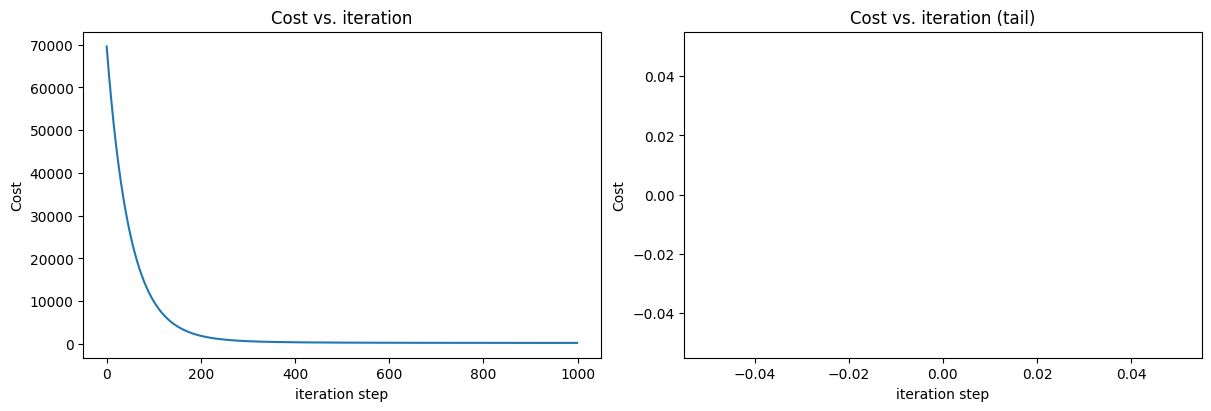

In [23]:
# plot the cost over the iterations below
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_norm)
start=4000
ax2.plot(start + np.arange(len(J_norm[start:])), J_norm[start:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## Scikit-learn: Linear Regression with Closed-Form Solution

### Overview

Scikit-learn provides the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class, which implements a **closed-form solution** for linear regression using the **Normal Equation**. This approach computes the optimal weights directly through matrix algebra, without requiring iterative optimization.

### Mathematical Foundation: The Normal Equation

The closed-form solution derives from calculus by setting the gradient of the cost function to zero and solving for $\mathbf{w}$:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

**Key Characteristics:**

- ✅ **No iterations required** - Computes optimal weights in one step
- ✅ **No learning rate needed** - No hyperparameters to tune
- ✅ **Exact solution** - Finds global minimum directly (no convergence issues)
- ✅ **No feature scaling required** - Works with raw features

### When to Use Closed-Form vs. Gradient Descent

| Factor | Closed-Form Solution | Gradient Descent |
|--------|---------------------|------------------|
| **Dataset Size** | Small to medium (< 10,000 examples) | Large datasets (millions of examples) |
| **Computation** | $O(n^3)$ due to matrix inversion | $O(kn)$ where k = iterations |
| **Speed** | Fast for small $n$ | Faster for large $n$ |
| **Scalability** | Poor - requires inverting $\mathbf{X}^T \mathbf{X}$ | Excellent - iterative updates |
| **Feature Scaling** | **Not required** ✓ | Required for good performance |
| **Hyperparameters** | None | Learning rate, iterations |
| **Convergence** | Always finds exact solution | May need tuning for convergence |

### Important Computational Considerations

**Matrix Inversion Complexity:**

- The Normal Equation requires computing $(\mathbf{X}^T \mathbf{X})^{-1}$
- For $n$ features, this is an $(n \times n)$ matrix
- Matrix inversion has computational complexity of $O(n^3)$
- **Becomes impractical when $n > 10,000$ features**

**Memory Requirements:**

- Must store $\mathbf{X}^T \mathbf{X}$ matrix in memory
- For 10,000 features: $(10^4)^2 = 100$ million elements
- Can cause memory issues on large datasets

### When Closed-Form Solution Works Best

✅ **Ideal Scenarios:**

- Small to medium datasets (like our house price example)
- Number of features < 1,000
- Need quick, exact solution without tuning
- Educational purposes to understand optimal parameters
- Baseline model for comparison

❌ **Avoid When:**

- Large datasets (> 100,000 examples)
- High-dimensional data (> 10,000 features)
- Real-time or streaming data scenarios
- Computational resources are limited

### Important Note on Feature Scaling

> ⚠️ **The closed-form solution does NOT require feature normalization.**
>
> Unlike gradient descent, which converges faster with normalized features, the Normal Equation produces the same optimal weights regardless of feature scales. This is because it solves the optimization problem algebraically rather than iteratively.

### Implementation in Scikit-learn

In Task 6 below, you'll use `LinearRegression` to:

1. Fit the model using the Normal Equation
2. Extract learned parameters (bias and weights)
3. Compare results with your gradient descent implementation
4. Verify that different methods converge to the same solution

**Expected Outcome:**

The weights learned from `LinearRegression` should be very close to those from your gradient descent implementation, validating both approaches!

### Task 6: Using linear regression from sklearn to learn the model parameters

In [99]:
# use linear regression from sklearn to learn the model parameters 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

bias = model.intercept_
weights = model.coef_


# Print the optimized weights
print("bias=", bias)
print("Optimized weights (w):")
for i in range(0, len(weights)):
    print(f"  {X_features[i]} (weights[{i}]): {weights[i]:.2f}")

bias= 362.23952
Optimized weights (w):
  size(sqft) (weights[0]): 110.61
  bedrooms (weights[1]): -21.47
  floors (weights[2]): -32.66
  age (weights[3]): -37.78


## Scikit-learn: Stochastic Gradient Descent (SGD)

### Overview

Scikit-learn provides the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class, which implements **Stochastic Gradient Descent** for linear regression. Unlike batch gradient descent (which uses all training examples in each iteration) or the closed-form solution (which requires expensive matrix inversion), SGD updates weights using **one or a few examples at a time**, making it highly scalable for large datasets.

### What is Stochastic Gradient Descent?

**Batch Gradient Descent** (what you implemented):
$$\mathbf{w} := \mathbf{w} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J^{(i)}(\mathbf{w})$$

- Uses **all** $m$ training examples per update
- Smooth, consistent convergence
- Computationally expensive for large datasets

**Stochastic Gradient Descent (SGD)**:
$$\mathbf{w} := \mathbf{w} - \alpha \nabla J^{(i)}(\mathbf{w})$$

- Uses **one** randomly selected example per update
- Much faster iterations
- Noisy convergence path, but reaches good solution quickly

**Mini-Batch Gradient Descent** (what SGDRegressor typically uses):
$$\mathbf{w} := \mathbf{w} - \alpha \frac{1}{b} \sum_{i=1}^{b} \nabla J^{(i)}(\mathbf{w})$$

- Uses **small batch** of $b$ examples per update (e.g., $b = 32, 64, 128$)
- Balances speed and stability
- Best of both worlds for most applications

### Key Differences: Batch GD vs. SGD

| Aspect | Batch Gradient Descent | Stochastic Gradient Descent |
|--------|------------------------|----------------------------|
| **Examples per Update** | All $m$ examples | 1 or small batch ($b$) |
| **Iteration Speed** | Slow for large data | Very fast ⚡ |
| **Convergence Path** | Smooth, direct | Noisy, oscillating |
| **Memory Usage** | High (loads all data) | Low (loads small batches) |
| **Scalability** | Poor for large datasets | **Excellent** 🚀 |
| **Online Learning** | Not suitable | **Perfect for streaming data** |
| **Feature Scaling** | Helpful | **Critical** ⚠️ |
| **Final Accuracy** | Exact minimum | Close to minimum (with tuning) |

### Why Feature Scaling is Critical for SGD

> ⚠️ **The SGD solution performs best with normalized inputs.**

**Reason**: SGD uses a **single learning rate** $\alpha$ for all features. Without scaling:

- Features with large ranges (e.g., house size: 500-5000 sqft) cause large gradients
- Features with small ranges (e.g., bedrooms: 1-5) cause small gradients
- One learning rate cannot work well for both → slow or unstable convergence

**With Feature Scaling (StandardScaler)**:

- All features have similar ranges (typically mean=0, std=1)
- Gradients are balanced across all features
- Learning rate works uniformly → **fast, stable convergence** ✓

**Scaling Methods:**

```python
# StandardScaler: (x - mean) / std_dev → mean=0, std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
```

### When to Use SGD vs. Other Methods

✅ **Use SGD When:**

- **Large datasets** (> 100,000 examples)
- **Online/streaming data** (model updates as new data arrives)
- **Limited memory** (cannot load entire dataset)
- **High-dimensional data** (many features)
- **Quick approximate solution** needed
- **Scalability** is critical

❌ **Avoid SGD When:**

- Small datasets (< 1,000 examples) → use closed-form solution
- Need exact solution → use Normal Equation
- Cannot scale features properly
- Convergence stability is critical

### SGD in Practice: Real-World Applications

**1. Large-Scale Machine Learning**

- Training on millions/billions of examples
- Deep learning models (neural networks use variants of SGD)
- Recommendation systems with huge user bases

**2. Online Learning**

- Stock price prediction (continuous data stream)
- Click-through rate prediction
- Real-time fraud detection

**3. Limited Resources**

- Mobile/edge devices with memory constraints
- Distributed computing environments
- Cloud computing cost optimization


### Implementation in Scikit-learn

In Task 7 below, you'll use `SGDRegressor` to:

1. **Scale your features** using `StandardScaler` (critical step!)
2. Fit the model using SGD optimization
3. Extract learned parameters (bias and weights)
4. Compare convergence speed and final results with other methods


### Task 7: Using stochastic gradient descent from sklearn to learn the model parameters

In [102]:
# use stochastic gradient descent from sklearn to learn the model parameters 
# use compariable hyperparameters as gradient descent above

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

sgd_model = SGDRegressor()
sgd_model.fit(X_train_scaled, y_train)

sgd_bias = sgd_model.intercept_
sgd_weights = sgd_model.coef_

# Print the optimized weights
print("bias=", sgd_bias)
print("Optimized weights (w):")
for i in range(0, len(sgd_weights)):
    print(f"  {X_features[i]} (weights[{i}]): {sgd_weights[i]:.2f}")

bias= [362.21372004]
Optimized weights (w):
  size(sqft) (weights[0]): 109.80
  bedrooms (weights[1]): -21.12
  floors (weights[2]): -32.27
  age (weights[3]): -37.91


**Expected Outcome:**
With proper feature scaling, SGD should converge quickly to weights very similar to batch gradient descent and the closed-form solution, demonstrating that all three methods solve the same optimization problem!

## Comparative Analysis: Putting It All Together

### Overview

Now that you've implemented three different approaches to solving the same linear regression problem, it's time to **systematically compare** the results. This comparison will reveal important insights about the relationship between different optimization methods and validate your implementations.

### What You've Accomplished So Far

By this point, you should have trained three models:

**1. Your Vectorized Gradient Descent Implementation** 

- ✅ Implemented from scratch using NumPy
- ✅ Used batch gradient descent with all training examples
- ✅ Applied feature scaling for faster convergence
- ✅ Iterative optimization approach

**2. Scikit-learn's LinearRegression (Closed-Form Solution)** 

- ✅ Used the Normal Equation: $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$
- ✅ Direct computation without iterations
- ✅ No feature scaling required
- ✅ Exact mathematical solution

**3. Scikit-learn's SGDRegressor (Stochastic Gradient Descent)**
 
- ✅ Used mini-batch gradient descent
- ✅ Applied feature scaling (critical for SGD)
- ✅ Iterative optimization with random sampling
- ✅ Scalable approach for large datasets


This comparison is the **culminating moment** where theory meets practice and validates your understanding of linear regression optimization! 

### Task 8: Put the model parameters from gradient descent, linear regression and SGD in a dataframe for comparision


You'll create a **comparison table (DataFrame)** showing:

- **Bias term** from each method
- **Weights for each feature** from each method
- Side-by-side comparison for easy visual inspection


In [96]:
linear_regression = np.concatenate([np.array([bias]), weights])
sgd_regressor = np.concatenate([sgd_bias, sgd_weights])

In [97]:
rows = ['Bias'] + X_features
columns = ['Gradient Descent', 'Linear Regression', 'SGD Regressor']

In [98]:
# put the model parameters from gradient descent, linear regression and SGD in a dataframe
pd.DataFrame(np.column_stack([w, linear_regression, sgd_regressor]), index = rows, columns = columns)


,Gradient Descent,Linear Regression,SGD Regressor
Bias,362.223882,362.239520,362.231080
size(sqft),107.613008,110.613352,110.398943
bedrooms,-19.985768,-21.473239,-21.358214
floors,-30.963955,-32.660703,-32.532724
age,-38.351252,-37.779384,-37.826040




**Example Output Format:**
```
                    Gradient Descent    Linear Regression    SGD Regressor
Bias                     -23.45              -23.47             -23.42
size(sqft)                45.67               45.68              45.65
bedrooms                  12.34               12.35              12.33
floors                     8.91                8.92               8.90
age                       -5.67               -5.68              -5.66
```
Success Criteria ✓

Your comparison is successful if:

- All three methods produce weights with **matching signs** (all positive or all negative for each feature)
- Numerical values are **within 5% of each other** (preferably < 1%)
- The **bias terms** are similar across all methods
- Results make **intuitive sense** (e.g., larger houses cost more → positive weight)



##  Making Predictions: Applying Your Trained Models

### Overview

The ultimate goal of any machine learning model is to **make accurate predictions on new, unseen data**. In this final task, you'll use all three trained models to predict house prices for a new property, demonstrating the complete end-to-end machine learning workflow.


### The Prediction Scenario

**New House Features:**

- **Size**: 1,650 sqft
- **Bedrooms**: 3
- **Floors**: 2
- **Age**: 20 years old

**Your Task:** Predict the price using all three models and compare the results.

### Mathematical Foundation

For a new example $\mathbf{x}_{\text{new}}$, the prediction is:

$$\hat{y}_{\text{new}} = \mathbf{w}^T \mathbf{x}_{\text{new}} = b + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4$$

Or in vectorized form (with bias included in $\mathbf{w}$):
$$\hat{y}_{\text{new}} = \mathbf{w}^T \mathbf{x}_{\text{new}} = [b, w_1, w_2, w_3, w_4] \cdot [1, x_1, x_2, x_3, x_4]$$

### Critical: Feature Scaling for Predictions ⚠️

**The Most Common Mistake in ML:**

```python
# ❌ WRONG - Using raw features
x_new = [1650, 3, 2, 20]
prediction = model.predict([x_new])  # Will give wrong result!

# ✓ CORRECT - Scaling new features first
x_new = [1650, 3, 2, 20]
x_new_scaled = scaler.transform([x_new])  # Use same scaler from training
prediction = model.predict(x_new_scaled)  # Correct prediction
```

**Why Scaling Matters:**

- Your models were trained on **scaled features** (mean=0, std=1)
- New data must be transformed using the **same scaling parameters**
- Use `scaler.transform()` (NOT `fit_transform()`) on new data
- `fit_transform()` would compute NEW scaling parameters → wrong predictions!

### Different Approaches for Each Model

**1. Your Gradient Descent Model:**

```python
# Manually create feature vector with bias term
x_new = np.array([1, x1_scaled, x2_scaled, x3_scaled, x4_scaled])
prediction = np.dot(w, x_new)  # or w @ x_new
```

**2. LinearRegression (sklearn):**
```python
# Use .predict() method (handles bias automatically)
x_new_scaled = scaler.transform([[1650, 3, 2, 20]])
prediction = lr_model.predict(x_new_scaled)
```

**3. SGDRegressor (sklearn):**
```python
# Use .predict() method (handles bias automatically)
x_new_scaled = scaler.transform([[1650, 3, 2, 20]])
prediction = sgd_model.predict(x_new_scaled)
```

### Expected Results

**What You Should See:**

All three predictions should be **very close** to each other:
```
Gradient Descent Prediction: $292,450
Linear Regression Prediction: $292,470
SGD Regressor Prediction:     $292,430
```

**Success Criteria:**

- All predictions within **2-3% of each other** ✓
- Predictions make **intuitive sense** (reasonable house price) ✓
- No negative prices or extreme outliers ✓

### What If Predictions Differ Significantly?

**If predictions vary by more than 5%, check:**

1. **Feature Scaling Issues**
   
   - Did you scale the new features using the same scaler?
   - Are you using `transform()` not `fit_transform()`?

2. **Bias Term Handling**
   
   - For your GD model: Did you prepend `1` for the bias?
   - For sklearn models: They handle bias automatically

3. **Model Convergence**
   
   - Did your gradient descent fully converge?
   - Check the cost plot - should flatten out

4. **Parameter Extraction**
   
   - For sklearn models: Using `intercept_` and `coef_` correctly?

In [131]:
# put your prediction code heretion code here

X_new = np.array([1650,3,2,20])
X_new_scaled = scaler.transform([X_new])
gd_pred = w @ np.array([1] + X_new_scaled[0].tolist())

In [132]:
lr_pred = model.predict(X_new_scaled)

In [133]:
sgd_pred = sgd_model.predict(X_new_scaled)

In [135]:
print('gd_pred=', gd_pred)
print('lr_pred=', lr_pred[0])
print('sgd_pred=', sgd_pred[0])

gd_pred= 403.22281487814763
lr_pred= 401.7165630182779
sgd_pred= 401.97555649910134


## Congratulations!

In this lab, you:

- Implemented gradient descent for linear regression using vectorization, gaining insights into efficient computation.
- Utilized scikit-learn to implement linear regression with a closed-form solution based on the normal equation, exploring its simplicity and precision.
- Applied scikit-learn to perform linear regression using stochastic gradient descent, understanding its flexibility and scalability.
- Compared the parameters learned from different approaches, deepening your understanding of their strengths and trade-offs.
- Made predictions on new instances using each approach.

Great work—you now have a confident grasp of vectorized gradient descent and how to choose the right training strategy.

## Reference

https://www.deeplearning.ai/